In [204]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')
warnings.filterwarnings('ignore', category=FutureWarning, module='pandas')

In [205]:
df = pd.read_csv("diabetes.csv")

df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


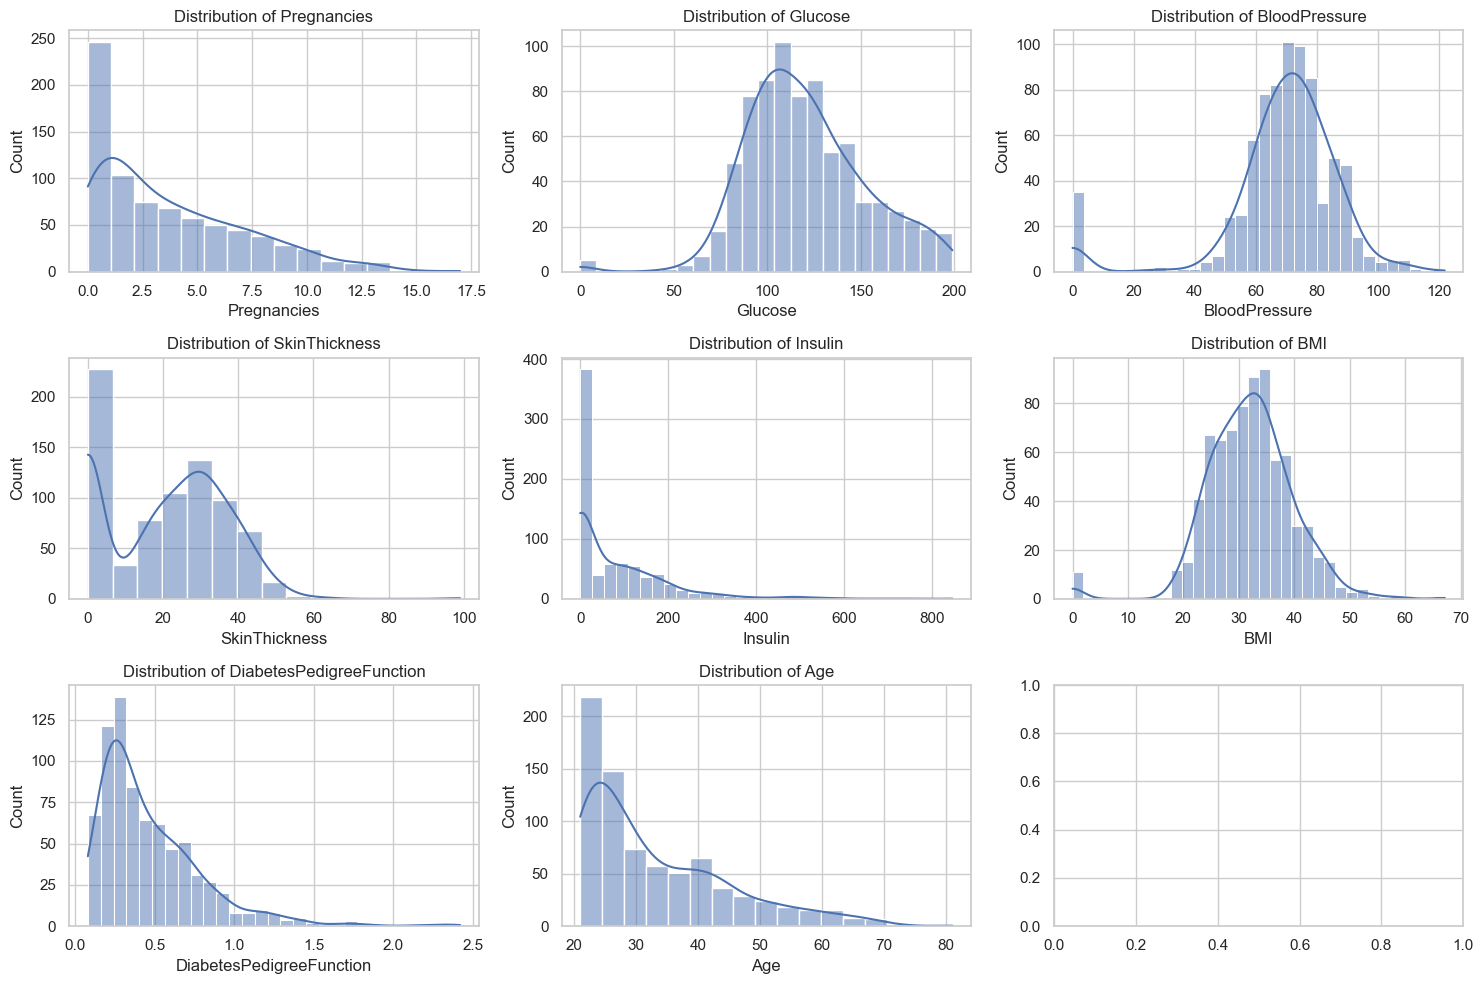

In [207]:
sns.set(style="whitegrid")

# Create a figure and axis for the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the 2D axes array for easier indexing
axes = axes.flatten()

# Loop through each column (excluding the 'Outcome' column)
for i, column in enumerate(df.columns[:-1]):
    sns.histplot(data=df, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

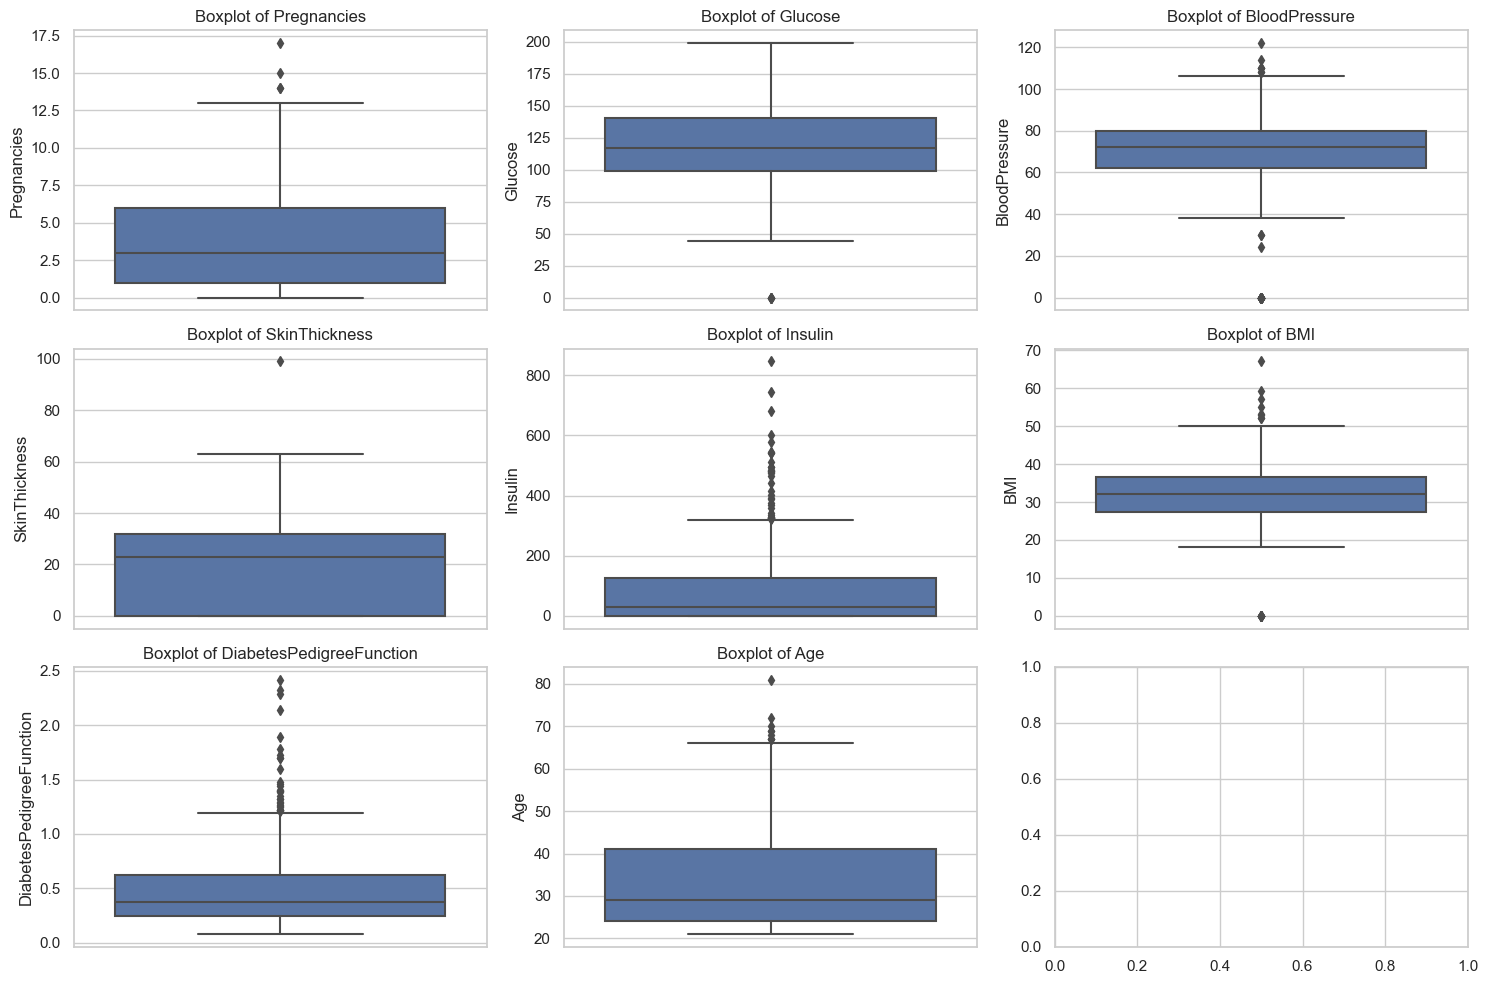

In [208]:
# Create a figure and axis for the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the 2D axes array for easier indexing
axes = axes.flatten()   

# Loop through each column (excluding the 'Outcome' column)
for i, column in enumerate(df.columns):
    # Exclude the 'Outcome' column
    if column != 'Outcome':
        # Create a boxplot for the current column
        sns.boxplot(data=df, y=column, ax=axes[i])
        axes[i].set_title(f'Boxplot of {column}')
        
# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [209]:
from sklearn.model_selection import train_test_split

X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [210]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=0)

# Fit and apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

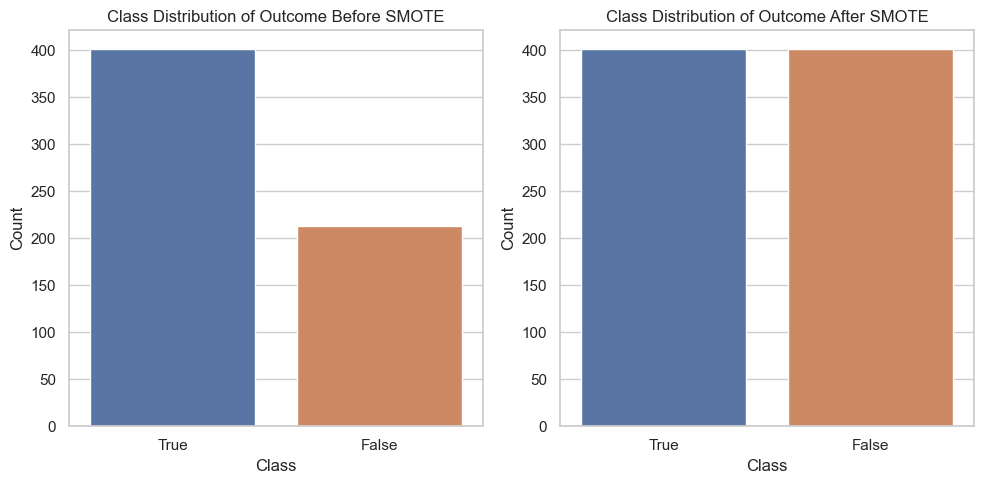

In [211]:
class_distribution_before = y_train.value_counts().sort_index()
class_distribution_after = y_train_resampled.value_counts().sort_index()

# Define class labels
class_labels = ['True', 'False']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot class distribution before SMOTE
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Class Distribution of Outcome Before SMOTE')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(class_labels)

# Plot class distribution after SMOTE
sns.countplot(x=y_train_resampled, ax=axes[1])
axes[1].set_title('Class Distribution of Outcome After SMOTE')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(class_labels)

plt.tight_layout()
plt.show()

In [212]:
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=3, 
                                                                  min_samples_split=2, 
                                                                  min_samples_leaf=1)
clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [213]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# param_grid = {
#     'max_depth': [2, 3, 5, 7, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'criterion': ['gini', 'entropy'],
#     'max_features': [None, 'sqrt', 'log2'],
#     'splitter': ['best', 'random'],
#     'ccp_alpha': [0.0, 0.01, 0.1, 0.2, 0.5]
# }

# clf = DecisionTreeClassifier(random_state=0)

# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5)

# grid_search.fit(X_train_resampled, y_train_resampled)

# best_params = grid_search.best_params_

# print(best_params)

In [214]:
# best_max_depth = best_params['max_depth']
# best_min_samples_split = best_params['min_samples_split']
# best_min_samples_leaf = best_params['min_samples_leaf']
# best_min_criterion = best_params['criterion']
# best_min_max_features = best_params['max_features']
# best_min_splitter = best_params['splitter']
# best_ccp_alpha = best_params['ccp_alpha']



# # With Pre-Pruning
# clf = DecisionTreeClassifier(random_state=0, criterion=best_min_criterion, max_depth=best_max_depth, 
#                                                                   min_samples_split=best_min_samples_split, 
#                                                                   min_samples_leaf=best_min_samples_leaf,
#                                                                   max_features=best_min_max_features,
#                                                                   splitter=best_min_splitter,
#                                                                   ccp_alpha=best_ccp_alpha)
# clf.fit(X_train_resampled, y_train_resampled)

In [215]:
# Access feature importances
feature_importances = clf.feature_importances_

# Print or visualize feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

Pregnancies: 0.0
Glucose: 0.4799097576511472
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI: 0.3219589914794596
DiabetesPedigreeFunction: 0.0
Age: 0.19813125086939323


In [216]:
y_preds = clf.predict(X_test)

In [217]:
print("Accuracy %.4f" % accuracy_score(y_test, y_preds))
print("Precision %.4f" % precision_score(y_test, y_preds))
print("Recall %.4f" % recall_score(y_test, y_preds))
print("F1 %.4f" % f1_score(y_test, y_preds))

Accuracy 0.6039
Precision 0.4712
Recall 0.8909
F1 0.6164


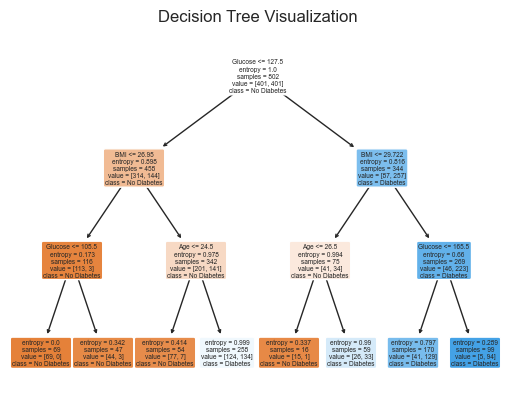

In [218]:
# plt.figure(figsize=(15, 12))

# Use the plot_tree function with adjusted parameters
plot_tree(clf,
          feature_names=X.columns,
          class_names=['No Diabetes', 'Diabetes'],
          filled=True,
          rounded=True,  
          )

# Add a title
plt.title("Decision Tree Visualization")

# Show the plot
plt.show()

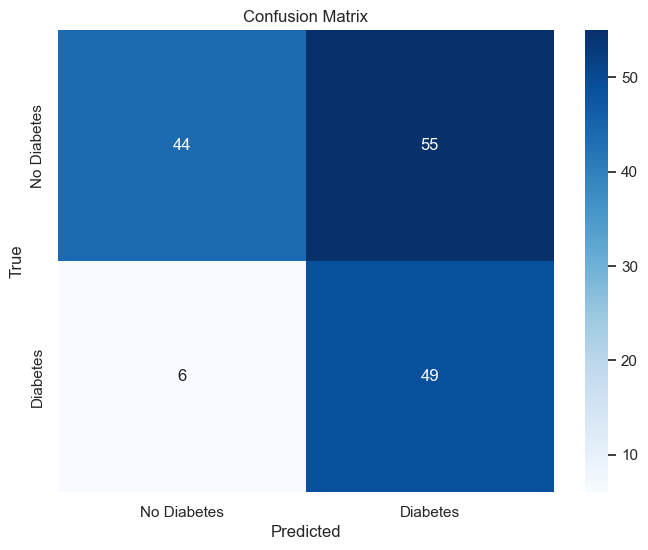

In [219]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_preds)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

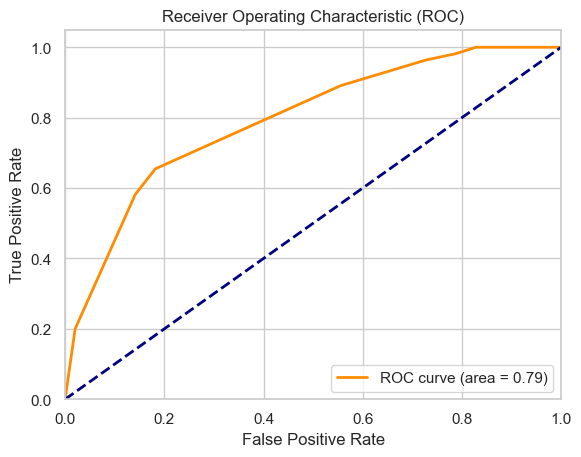

In [220]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()